# Load the dataset

In [54]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# You can find the data under https://drive.google.com/drive/folders/1e550az93U3_kfRBbVY5PZnMKYwGYmHqi?usp=sharing

import pandas as pd
import numpy as np

train_data = pd.read_csv("/content/drive/My Drive/HW1/train_data.csv")     # One line of code
train_label = pd.read_csv("/content/drive/My Drive/HW1/train_label.csv")   # One line of code

test_data = pd.read_csv("/content/drive/My Drive/HW1/test_data.csv")       # One line of code
test_label = pd.read_csv("/content/drive/My Drive/HW1/test_label.csv")      # One line of code

In [56]:
# show random samples from the training data
print(train_data.shape)
print(test_data.shape)
print(train_data.sample(np.random.randint(1,14)))    # One line of code

(793, 49)
(207, 49)
      id  duration  ...  job_unskilled resident  own_telephone_yes
519  520         6  ...                       0                  0
168  169        24  ...                       0                  1
231  232         9  ...                       1                  0
44    45        48  ...                       1                  0
54    55        36  ...                       0                  1
248  249        24  ...                       0                  0
462  463        12  ...                       0                  0
152  153        36  ...                       0                  0
103  104         9  ...                       0                  1

[9 rows x 49 columns]


# Train Decision Tree with default parameters

In [57]:
from sklearn.tree import DecisionTreeClassifier

# Train decision tree using the whole training data with **entropy** criteria

dt = DecisionTreeClassifier(criterion='entropy')              # One line of code
dt = dt.fit(train_data, train_label)                          # One line of code


# Estimate the prediction of test data
test_pred = dt.predict(test_data)                              # One line of code

# Calculate accuracy of test data
from sklearn.metrics import accuracy_score
TestAcc = accuracy_score(test_label, test_pred)                 # One line of code
print("Testing Accuracy = %.5f%%" % (TestAcc * 100))

Testing Accuracy = 68.59903%


# FineTune Decision Tree parameters

1- Spliting dataset into train and validation 

In [0]:
# Split training data to 70% training and 30% validation
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train_data, train_label, train_size = 0.7)   # One line of code

2- FineTune minimum sample split

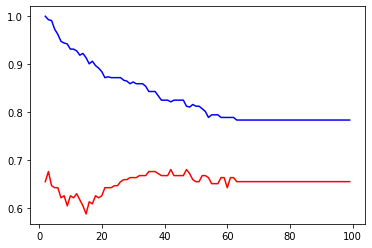

In [59]:
min_samples_splits = range(2, 100)

train_results = []
val_results = []
for min_samples_split in min_samples_splits:
  
  # Fit the tree using the 70% portion of the training data

  dt = DecisionTreeClassifier(criterion='entropy', min_samples_split= min_samples_split)
  dt = dt.fit(x_train, y_train)

  # Evaluate on Training set
  train_pred = dt.predict(x_train)                    # One line of code
  train_acc = accuracy_score(y_train, train_pred )    # One line of code
  train_results.append(train_acc)
   
  # Evaluate on Validation set
  val_pred = dt.predict(x_val)                        # One line of code
  val_acc = accuracy_score(y_val, val_pred)
  val_results.append(val_acc)
  
# Ploting
import matplotlib.pyplot as plt

plt.plot(min_samples_splits, train_results, 'b')
plt.plot(min_samples_splits, val_results,'r')
plt.show()

In [60]:
# Choose the best minimum split sample based on the plot
val_results2 = val_results[20:] #to prevent overfitting
Best_minSampl = min_samples_splits[val_results2.index(max(val_results2))]  # One line of code
#print(Best_minSampl)

# Train decision tree using the full training data and the best minimum split sample
dt = DecisionTreeClassifier(criterion='entropy', min_samples_split= Best_minSampl)  # One line of code
dt = dt.fit(x_train, y_train)                                                       # One line of code
  

# Estimate the prediction of the test data
test_pred = dt.predict(test_data)                     # One line of code

# Calculate accuracy of test data
TestAccFineTuned = accuracy_score(test_label,test_pred)            # One line of code
print("Testing Accuracy = %.5f%%" % (TestAccFineTuned * 100))

Testing Accuracy = 72.46377%


# Now, apply the same procedure but using KNN instead of decision tree 

# For finetuning, find the best value of K to use with this dataset.

In [61]:
# Write your code here

from sklearn.neighbors import KNeighborsClassifier

# initialize the values of k to be a list of odd numbers between 1 and 30
kVals = range(1, 30, 2)

# Save the accuracies of each value of kVal in [accuracies] variable
# hint: you can use accuracies.append(...) function inside the loop
accuracies = []

#(x_train, x_val, y_train, y_val) = train_test_split(train_data, train_label, test_size=0.3)

# loop over values of k for the k-Nearest Neighbor classifier
for k in kVals:
  # Follow what we did in decision tree part

  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train.values.ravel())

  score = knn.score(x_val,y_val)
  print("For k = %d, validation accuracy = %.5f%%" % (k, score * 100))
  accuracies.append(score)

# Train KNN using the full training data with the best K that you found
BestK = kVals[accuracies.index(max(accuracies))]
#print(BestK)

print("\n")

knn = KNeighborsClassifier(n_neighbors=BestK)
knn.fit(x_train, y_train.values.ravel())
ValScore = knn.score(x_val,y_val)
print("Validation Accuracy = %.5f%%, for the best k=%d" % (ValScore * 100,BestK))

# Testing
TestScore = knn.score(test_data,test_label)
print("Test Accuracy = %.5f%%, for k=%d" % (TestScore * 100,BestK))


For k = 1, validation accuracy = 59.66387%
For k = 3, validation accuracy = 60.92437%
For k = 5, validation accuracy = 63.86555%
For k = 7, validation accuracy = 63.44538%
For k = 9, validation accuracy = 63.44538%
For k = 11, validation accuracy = 64.28571%
For k = 13, validation accuracy = 65.12605%
For k = 15, validation accuracy = 66.80672%
For k = 17, validation accuracy = 69.32773%
For k = 19, validation accuracy = 68.90756%
For k = 21, validation accuracy = 69.32773%
For k = 23, validation accuracy = 68.90756%
For k = 25, validation accuracy = 68.48739%
For k = 27, validation accuracy = 68.48739%
For k = 29, validation accuracy = 68.90756%


Validation Accuracy = 69.32773%, for the best k=17
Test Accuracy = 71.01449%, for k=17


# Bonus

# Apply gridsearch using decision tree on any hyperparameter(s) of your choice, you have to beat your previous obtained accuracies to get the bonus


In [62]:
# Write your code here
from sklearn.model_selection import GridSearchCV

#DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
#                      max_depth=None, max_features=None, max_leaf_nodes=None,
#                      min_impurity_decrease=0.0, min_impurity_split=None,
#                      min_samples_leaf=1, min_samples_split=2,
#                      min_weight_fraction_leaf=0.0, presort='deprecated',
#                      random_state=None, splitter='best')
#'min_weight_fraction_leaf': [0.0,0.2,0.25,0.3,0.5]}
#'criterion' : ['gini', 'entropy']
#'min_samples_leaf' : range(2,30)
#'min_weight_fraction_leaf' : [0.0,0.2,0.5]

#tempHyper = [[ [0.0 for k in range(20) ] for i in range(100)] for j in range(20)]
tempHyper = [ [0.0 for i in range(100)] for j in range(20)]

maxDepth = range(1,20)
minSplit = range(2,100)

for i in maxDepth:
  for k in minSplit:
    dt = DecisionTreeClassifier('entropy', max_depth=i, min_samples_split=k)
    dt.fit(x_train,y_train)
    
    tempPred = dt.predict(x_val)
    score = accuracy_score(y_val,tempPred)
    tempHyper[i][k] = score

#print(tempHyper)

maxScore = np.amax(tempHyper)
sols = np.argwhere(tempHyper==maxScore)
#print(sols)
depth = sols[0][0]
split = sols[0][1]
print("*** BRUTE-FORCE ***")
print("Validation Accuracy = %.5f%%" % (maxScore * 100))

#testing the data with my approach
dt = DecisionTreeClassifier('entropy', max_depth=depth, min_samples_split=split)
dt = dt.fit(train_data,train_label)
testPred = dt.predict(test_data)
maxScore = accuracy_score(test_label,test_pred)
print("Testing Accuracy = %.5f%%" % (maxScore * 100))

#GridSearch Algorithm
grid_param= { 'max_depth': range(1,21), 'min_samples_split': range(2,100) }  
dt = DecisionTreeClassifier('entropy')
dt = GridSearchCV(dt, grid_param)
dt = dt.fit(train_data,train_label)
#dt = dt.fit(x_train,y_train)

GridPred = dt.predict(test_data)

GridAcc = dt.best_score_
print("\n*** Grid Search ***")
print("Testing Accuracy = %.5f%%" % (GridAcc * 100))

ResultAccuracies = [GridAcc, TestAcc, TestAccFineTuned, TestScore, maxScore]
if(max(ResultAccuracies) == GridAcc or max(ResultAccuracies) == maxScore):
  if(maxScore > GridAcc):
    print("\nBONUS is Acquired by using Brute-Force!")
  else:
    print("\nBONUS is Acquired by using GridSearch!")
else:
  print("\n!!! FAIL - NO BONUS !!!")

#results for all accuracies
print("\n*** ALL RESULTS ***")
print("Default Decision Tree Accuracy = \t%.5f%%" % (TestAcc * 100))
print("Fine-Tuned Decision Tree Accuracy = \t%.5f%%" % (TestAccFineTuned * 100))
print("KNN Accuracy = \t\t\t\t%.5f%%" % (TestScore * 100))
print("GridSearch Accuracy = \t\t\t%.5f%%" % (GridAcc * 100))
print("Brute-Force Accuracy = \t\t\t%.5f%%" % (maxScore * 100))

#what changes we did with the GridSearch vs Mine
print("\n*** CHANGES with GridSearch ***\t\t\t\tGrid vs. Brute-Force")
print("Changed hyperparameter is --> max_depth = \t\t" + str(dt.best_estimator_.max_depth) + " vs. " + str(depth))
print("Changed hyperparameter is --> min_samples_split = \t" + str(dt.best_estimator_.min_samples_split) + " vs. " + str(split))

#to see the best values found in our code before
print("\n*** DATA ***")
print("Best (found) min_samples_split = " + str(Best_minSampl))
print("Best (found) k-NN = " + str(BestK))



*** BRUTE-FORCE ***
Validation Accuracy = 70.16807%
Testing Accuracy = 72.46377%

*** Grid Search ***
Testing Accuracy (gridDefault) = 73.51962%

BONUS is Acquired by using GridSearch!

*** ALL RESULTS ***
Default Decision Tree Accuracy = 	68.59903%
Fine-Tuned Decision Tree Accuracy = 	72.46377%
KNN Accuracy = 				71.01449%
GridSearch Accuracy = 			73.51962%
Brute-Force Accuracy = 			72.46377%

*** CHANGES with GridSearch ***				Grid vs. Brute-Force
Changed hyperparameter is --> max_depth = 		7 vs. 6
Changed hyperparameter is --> min_samples_split = 	66 vs. 32

*** DATA ***
Best (found) min_samples_split = 22
Best (found) k-NN = 17


# Report: Write a summary of your approach to this problem; this should be like an abstract of a paper or the executive summary (you aim for clarity and passing on information, not going to details about known facts such as what decision trees are, assuming they are known to people in your research area).

Must include statements such as:


*   Include the problem definition: 1-2 lines
*   Talk about train/val/test sets, size and how split.
*   State what your test results are with the chosen method, parameters: e.g. "We have obtained the best results with the ….. classifier (parameters=....) , giving classification accuracy of …% on test data…."
*   Comment on the speed of the algorithms and anything else that you deem important/interesting (e.g. confusion matrix)



# Write your report in this cell

  The problem is to decide, based on the given data of some people, wheter the person is a good (reliable) or bad (unreliable). We are trying to fit an accurate decision tree that will help to decide later data of the people. There are 49 different inputs (features) such as credit amount, age, retirement info etc. and there is only one output (label) which are good or bad.

  The number of data our training set (train_data) is 793 and our test size (test_data) is 207. First, we used all of the training data to create a decision tree with the criterion hyperparameter "entropy". Then, when we are finished with the basic decision tree, we test our data with the data set test_data and our accuracy usually stands between 65-70%. 

  Then, we want to improve our accuracy by changing the min_samples_split hyperparameter of the DecisionTreeClassifier. In order to increase our accuracy, we wanted to try different values between 2-100 for min_samples_split, and we created a for loop to iterate over the values of min_samples_split and an array to store the accuracies of the train data and validation data. The important thing here is splitting randomly our whole training data into 2 parts which are traing data (x_train) and validation data (x_val) with the ratio of 0.7 to 0.3. The training data is to train the decision tree and the rest is to validate the training results. After the for loop, we find the best validation accuracy with given min_samples_split. In that part, you can see a a little code which is to prevent overfitting. In the array of validation accuracies, I wanted to pick a values that maximizes the validation accuracy but not overfitting. So, I started the search from the index 20. When we find the best validation accuracy and the best resulted min_samples_split, we used it to fine-tune our decision tree. We created a decision tree with the criterion hyperparameter as "entropy" and min_samples_split as Best_minSampl. Then, we fit our test_data into our fine-tuned decision tree, and get an accuracy a bit better then the basic decision tree. The accuracy of the fine-tuned decision tree stands between 67-71%. 
  
  Thirdly, we used k-Nearest Neigbor algorithm to find an accuracy. So, with different k values ranging between 1-30, we used the same data sets we splitted before. We used training data to train our model with the changing hyperparameter k. Then, we validate the model and store the accuracies in order to compater later on to decide which k value gives the best accuracy. When to loop ends, we find the best k value that gives best validation accuracy and we test our data with the found k value. The accuracy of k-NN algorithm usually stands between 70-72%. Slightly better than the fine-tuned decision tree.

  Last but not least, as a bonus, we used grid-search algorithm to find what hyperparameters we could change to get a better result than the fine-tuned decision tree. For this part, I used a brute-force algorithm to change 2 hyperparameters, max_depth of the tree and min_samples_split, simultaneously. The brute-force algorithm is running 2 for loops and changing the hyperparameters and stores the training accuracies. Then, finding the best accuracy and the hyperparameters that satisfy the accuracy. In the end, we create a decision tree with the brute-force found max_depth and min_samples_split hyperparameters. The running time is O(nk) where n and k denotes the ranges of tried hyperparameter values. The accuracy of this usually stands between 66-69%, which is not efficient at all. However, the real algorithm, grid search, finds the best hyperparameters slower but the accuracy is much higher than the basic decision tree. In the grid search algorithm just changing the max_depth and min_samples_split hyperparatmeters increase our accuracy like 5% most of the time.

  Finally, in order to obtain the best test accuracy, one should use the grid search algorithm with the changing hyperparameters max_depth and min_samples_split. The worst accuracy obtained by the basic decision tree with no given hyperparameters. (entropy is not included) K-NN and fine-tuned decision tree algorithms are not that complex or does not take long time but the accuracies are a bit lower than the grid search algorithm. The accuracy of the tests are inversely proportional to the complexity of the algorithm. 
  
#To see the all accuracies and the hyperparameter values, please see the last coding block, which states nearly everything.








